In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(10)
X = np.random.rand(1000, 1)*14 - 10
y = (X**2) + 0.5*(X) + np.random.rand(1000, 1)*20

In [3]:
print("X.shape =", X.shape)
print("y.shape =", y.shape)

X.shape = (1000, 1)
y.shape = (1000, 1)


Text(0, 0.5, 'y (output)')

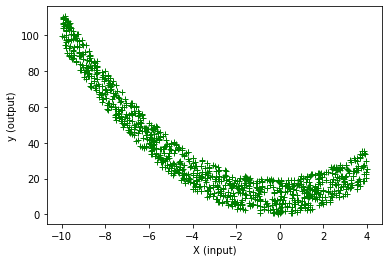

In [4]:
# Plotting X vs y
plt.plot(X, y, '+', color='green')
plt.xlabel("X (input)")
plt.ylabel("y (output)")

In [5]:
# %timeit np.hstack((np.ones((100, 1)), X))
print("6.74 µs ± 10.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)")

6.74 µs ± 10.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [6]:
# %timeit (np.stack((np.ones((100, 1)), X), axis=1)).reshape((100, 2))
# hstack is faster in this case so we will use that
print("9.05 µs ± 80.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)")

9.05 µs ± 80.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [7]:
X = np.hstack((np.ones((1000, 1)), X))

In [8]:
X.shape

(1000, 2)

In [9]:
theta = np.zeros((X.shape[1], 1))
theta

array([[0.],
       [0.]])

In [10]:
X_train = X[:int(-0.2*len(X)), :]
X_test = X[int(-0.2*len(X)):, :]
print("X_train.shape =", X_train.shape)
print("X_test =", X_test.shape)
y_train = y[:int(-0.2*len(y))]
y_test = y[int(-0.2*len(y)):]
print("y_train.shape =", y_train.shape)
print("y_test.shape =", y_test.shape)

X_train.shape = (800, 2)
X_test = (200, 2)
y_train.shape = (800, 1)
y_test.shape = (200, 1)


#### Linear Regression without regularization

In [11]:
def hypothesis(X, theta):
    #            (m, 4) , (4, 1)
    return np.dot(X, theta)

In [12]:
def cost_function(X, y, theta):
    m = X.shape[0]
    h = hypothesis(X, theta)
    return ((h-y).T.dot(h-y))[0][0]/m

In [13]:
def gradient(X, y, theta):
    m = X.shape[0]
    h = hypothesis(X, theta)
    return X.T @ (h-y)

In [14]:
def closed_solution(X, y):
    return (np.linalg.inv(X.T.dot(X))).dot(X.T.dot(y))

In [38]:
def gradient_descent(X, y, learning_rate=0.001, epochs=100):
    m = X.shape[0]
    theta = np.zeros((X.shape[1], 1))
    errors = []
    iters = []
    for i in range(1, epochs+1):
        grad = gradient(X, y, theta)
        theta = theta - ((learning_rate)/m) * grad
        new_cost = cost_function(X, y, theta)
        iters.append(i)
        errors.append(new_cost)
#     plt.plot(iters, errors)
    return theta, new_cost

250.72425423529347


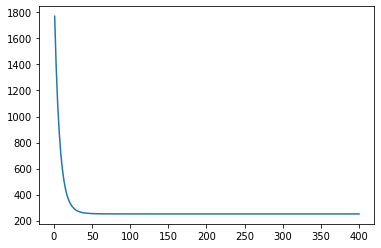

In [35]:
theta_updated, new_cost = gradient_descent(X_train, y_train, 0.072, 400)
print(new_cost)

Cost on train set = 250.72425423529347


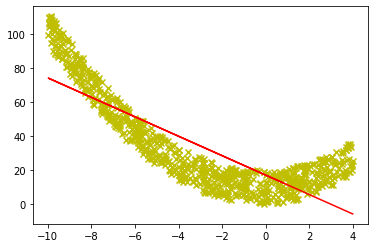

In [17]:
plt.scatter(X_train[:, 1], y_train, color='y', marker='x')
plt.plot(X_train[:, 1], hypothesis(X_train, theta_updated), color='red')
print("Cost on train set =", cost_function(X_train, y_train, theta_updated))

Cost on test set = 251.05701046948033


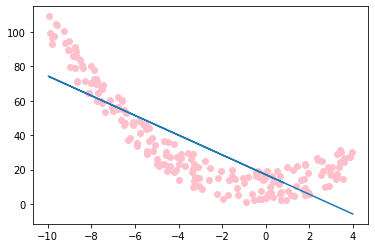

In [18]:
plt.scatter(X_test[:, 1], y_test, color='pink')
plt.plot(X_train[:, 1], hypothesis(X_train, theta_updated))
print("Cost on test set =", cost_function(X_test, y_test, theta_updated))

##### Clearly, the Linear Regression model is underfitting this data because the model has lower complexity (dimensions) as compared to the data

##### To confirm this, let's plot the learning curve for the Linear Regression model (Univariate)

In [48]:
def learning_curve(X_train, y_train, X_test, y_test, size=100):
    train_costs = []
    test_costs = []
    m_s = np.arange(1,size+1)
    for i in range(1, size+1):
        train_theta, train_cost = gradient_descent(X_train[:i, :], y_train[:i, :], 0.01, 200)
        train_costs.append(train_cost)
        test_costs.append(cost_function(X_test[:, :], y_test, train_theta))
    plt.plot(m_s, train_costs, 'r')
    plt.plot(m_s, test_costs, 'b')  
    plt.xlabel('Examples')
    plt.ylabel('MSE (Mean Squared Error)')

Text(0.5, 1.0, 'Learning curve of Linear Model')

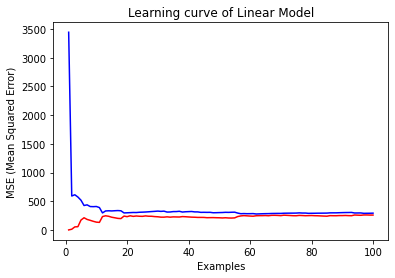

In [47]:
learning_curve(X_train, y_train, X_test, y_test, 100)
plt.title("Learning curve of Linear Model")

#### This plot shows that even though the training and generalization errors are almost the same, but the model is performing poorly. So the model performs poorly on both the training and the testing data which shows that it has high bias. In our case, the model is not 'complex' enough (which can mean has less features/dimensions or maybe has been regularized too much) and does not have enough dimensions to deal with the data

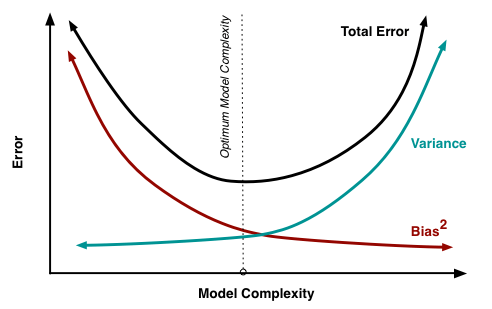

As can be seen from the graph, our data is quadratic whereas our model is linear so it is less complex. So we have high bias and low variance (because it performs poorly on all data alike and does not change heavily on introducing small fluctuations on the training set)

### To deal with High Bias:
##### 1. Increase the number of weights
##### 2. Decrease the number of features in the data to make it simpler
##### 3. Increase the number of training examples

##### Increasing the number of weights can be useful if our model has the capability of becoming more complex on introducing more weights. A linear model can not become more complex and thus introducing new weights will be a waste of time as we are not bottlenecking the model because of less features. Also, we already have taken a large number of training examples in the linear model but that did not help.

### So we will have to choose a more complex model like a Polynomial model

Text(0, 0.5, 'y_new')

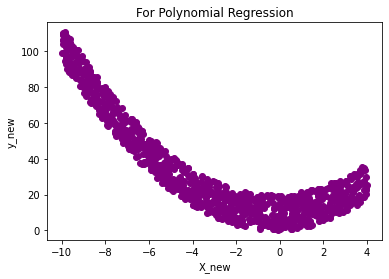

In [21]:
np.random.seed(10)
X_new = np.random.rand(1000, 1)*14 - 10
y_new = (X_new**2) + 0.5*(X_new) + np.random.rand(1000, 1)*20
plt.scatter(X_new, y_new, color='purple')
plt.title('For Polynomial Regression')
plt.xlabel('X_new')
plt.ylabel('y_new')

In [22]:
from sklearn.model_selection import train_test_split
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, train_size=0.7)
X_new_train = np.hstack(  (np.ones((X_new_train.shape[0], 1)), X_new_train)  )
X_new_test = np.hstack(  (np.ones((X_new_test.shape[0], 1)), X_new_test)  )

Text(0, 0.5, 'y_new_train')

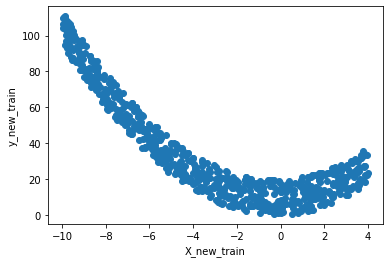

In [23]:
plt.scatter(X_new_train[:, 1:], y_new_train)
plt.xlabel('X_new_train')
plt.ylabel('y_new_train')

In [24]:
print(X_new_train.shape)
print(X_new_test.shape)
print(y_new_train.shape)
print(y_new_test.shape)

(700, 2)
(300, 2)
(700, 1)
(300, 1)


Let's define functions that will transform and normalize our training/testing input data set (X_new_train or X_new_test) as per the degree of polynomial we want our model to be using, assuming that our X has mono-degree input data X^1 and not higher powers.

In [54]:
def normalize(X) :
         X[:, 1:] = ( X[:, 1:] - np.mean( X[:, 1:], axis = 0 ) ) / np.std( X[:, 1:], axis = 0 )
         return X

In [26]:
def X_transform(X, degree):
    for i in range(1, X.shape[1]):
        for deg in range(2, degree+1):
            x_i_deg = (X[:, i]**deg).reshape(-1, 1)
            X = np.hstack((X, x_i_deg))
    return X

In [27]:
X_tran_train = X_transform(X_new_train, 2)
X_tran_test = X_transform(X_new_test, 2)
X_tran_train = normalize(X_tran_train)
X_tran_test = normalize(X_tran_test)

In [28]:
print(X_tran_train.shape)
print(X_tran_test.shape)

(700, 3)
(300, 3)


Now let's simply apply Linear Regression!
After all, polynomial regression means including higher powers of the input features, not the weights, so we can consider polynomial regression as an extended form on Linear Regression

array([[35.10490075],
       [ 2.34387219],
       [29.40727072]])

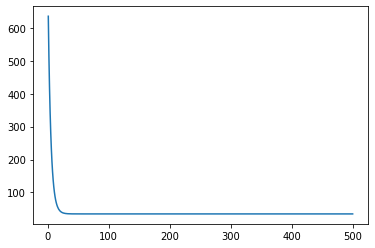

In [36]:
theta_new, cost_new = gradient_descent(X_tran_train, y_new_train, 1.02 , 500)
theta_new

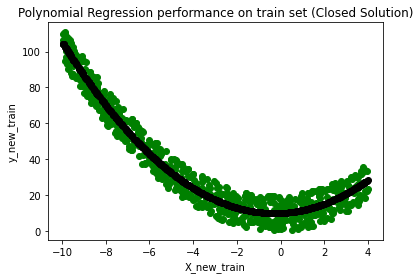

theta_closed
 [[35.10490075]
 [ 2.34387219]
 [29.40727072]]
closed_cost
 34.35988703841248


In [30]:
theta_closed = closed_solution(X_tran_train, y_new_train)
plt.scatter(X_new_train[:,1:], y_new_train, color='green')
plt.xlabel('X_new_train')
plt.ylabel('y_new_train')
plt.title("Polynomial Regression performance on train set (Closed Solution)")
plt.scatter(X_new_train[:, 1:], hypothesis(X_tran_train, theta_closed), color='black')
plt.show()
print("theta_closed\n", theta_closed)
print("closed_cost\n", cost_function(X_tran_train, y_new_train, theta_closed))

#### This also confirms that both Gradient Descent and Closed Solution have worked well on this data. Since the data is not huge, the closed solution performed better than Gradient Descent

In [50]:
%timeit closed_solution(X_tran_train, y_new_train)

57.9 µs ± 1.27 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [53]:
%timeit gradient_descent(X_tran_train, y_new_train, 1.02 , 500)

7.55 ms ± 16.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


theta_new
 [[35.10490075]
 [ 2.34387219]
 [29.40727072]]
cost_new
 34.35988703841249


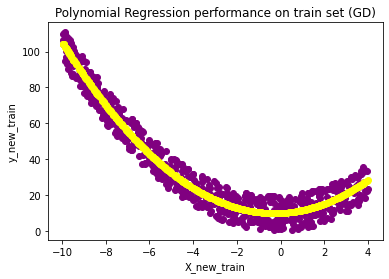

In [31]:
plt.scatter(X_new_train[:,1:], y_new_train, color='purple')
plt.xlabel('X_new_train')
plt.title("Polynomial Regression performance on train set (GD)")
plt.ylabel('y_new_train')
plt.scatter(X_new_train[:, 1:], hypothesis(X_norm_train, theta_new), color='yellow')
print("theta_new\n", theta_new)
print("cost_new\n", cost_new)

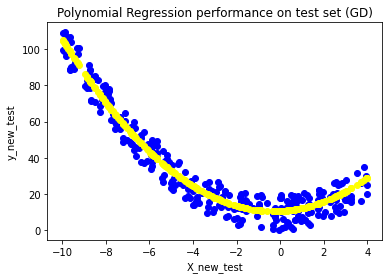

In [32]:
plt.scatter(X_new_test[:,1:], y_new_test, color='blue')
plt.title("Polynomial Regression performance on test set (GD)")
plt.xlabel('X_new_test')
plt.ylabel('y_new_test')
plt.scatter(X_new_test[:, 1:], hypothesis(X_tran_test, theta_new), color='yellow')

In [33]:
test_cost = cost_function(X_tran_test, y_new_test, theta_new)
test_cost

34.92023250878217

#### The learning curve below shows that the quadratic model was able to fit the data well. Since both the training and testing errors dropped down significantly and are roughly equal, hence this model has been successful

Text(0.5, 1.0, 'Learning curve of Polynomial model of degree 2')

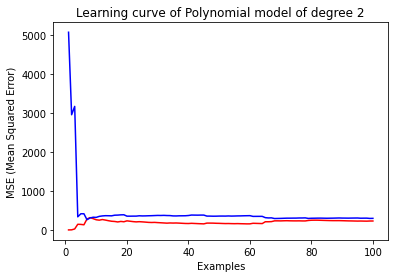

In [49]:
learning_curve(X_new_train, y_new_train, X_new_test, y_new_test)
plt.title("Learning curve of Polynomial model of degree 2")